In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Linear fit
We have data $\{x_i, y_i\}$, and function $y = f(x, m, c) = m x + c$ to fit for optimal $m$ and $c$. We minimize
$$
L(m, c) = \frac 1N\sum_{i}(y_i - f(x_i, m, c))^2 = \frac 1N\sum_{i}(y_i - m x_i - c)^2
$$

$$
L(m, c) = \frac 1N\sum_{i}(y_i^2 + m^2 x_i^2 + c^2 - 2 m x_i y_i - 2 c y_i + 2 m c x_i)
$$

$$
L(m, c) = m^2 \langle x^2\rangle  + c^2 + \langle y^2\rangle + 2 m c \langle x\rangle - 2 m \langle x y\rangle - 2 c \langle y\rangle
$$

Where $\langle ... \rangle = \frac 1N \sum_i (...)_i$ denotes the statistical average over the dataset. The optimal $m$ and $c$ are computed by minimising $L(m, c)$, for which we compute solutions of 

$$
\frac{\partial L}{\partial m} = 0; \qquad \frac{\partial L}{\partial c} = 0
$$

$$
\frac{\partial L}{\partial c} = 2 c + 2 m \langle x\rangle - 2 \langle y\rangle = 0;\quad
\frac{\partial L}{\partial m} = 2 m \langle x^2\rangle + 2 c \langle x\rangle - 2\langle x y\rangle = 0
$$

$$
m \langle x\rangle + c = \langle y\rangle;\quad
m \langle x^2\rangle + c \langle x\rangle = \langle x y\rangle
$$

This results in solution of $m$ and $c$ as

$$
m = \frac{\langle xy \rangle - \langle x \rangle \langle y \rangle} {\langle x^2 \rangle - \langle x\rangle^2};\quad
c = \frac{\langle x^2 \rangle\langle y \rangle - \langle x\rangle \langle xy \rangle} {\langle x^2 \rangle - \langle x\rangle^2}
$$



In [45]:
M, C = 1.2, 0.5
x = 2 * np.pi * np.linspace(0, 3, 10000)

def lin(x, m, c):
    return m * x + c
#

def cube(x, m, c):
    return m * x**3 + c
#

def get_linpar(x, y):
    N = x.shape[0]
    avg_x, avg_y = x.mean(), y.mean()
    avg_x2 = (x**2).mean()
    avg_xy = (x*y).mean()
    den = avg_x2 - avg_x**2
    m = (avg_xy - avg_x * avg_y) / den
    c = (avg_x2 * avg_y - avg_x * avg_xy) / den
    return np.array([m, c])
#

y = lin(x, M, C) + np.random.uniform(low=-3, high=3, size=x.shape[0])

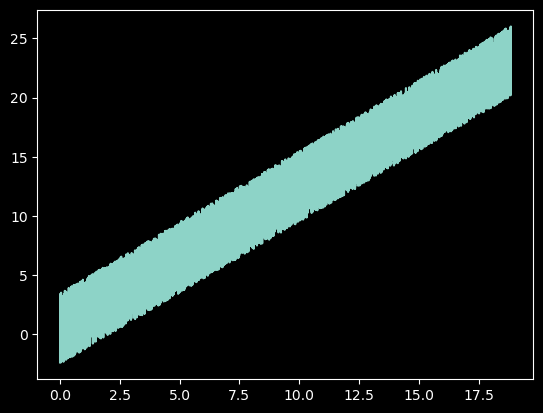

In [46]:
plt.plot(x, y)

In [47]:
m, c = get_linpar(x, y)

In [48]:
p, cov = curve_fit(lin, x, y, method='lm')

In [49]:
p, m, c

(array([1.20194407, 0.48364804]), 1.2019440725713064, 0.4836480408432164)

In [57]:
nsample = 10000
nsize = 100
mi, ci = np.zeros(nsample), np.zeros(nsample)
for i in range(nsample):
    ii = np.random.randint(0, x.shape[0], size=nsize)
    xi, yi = x[ii], y[ii]
    # mi[i], ci[i] = get_linpar(xi, yi)
    (mi[i], ci[i]), _ = curve_fit(cube, xi, yi)


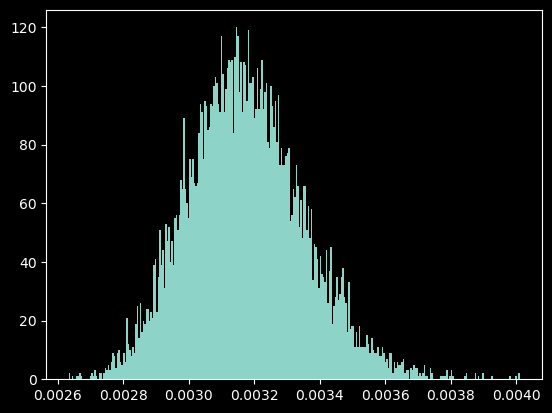

In [58]:
a = plt.hist(mi, bins=300)

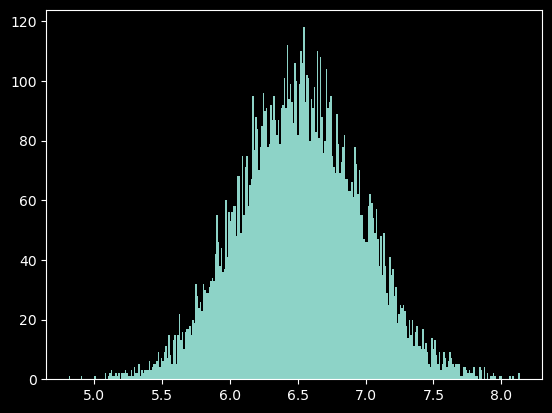

In [59]:
b = plt.hist(ci, bins=300)